# Final Exam - Classification


##Reference
* [Dataset](https://github.com/MicrosoftLearning/Principles-of-Machine-Learning-Python/tree/master/Final%20Exam)


## Import Libraries

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from functools import reduce
from datetime import datetime
from sklearn import feature_selection as fs
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sklearn.model_selection as ms
from sklearn import svm
import sklearn.metrics as sklm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier



### Read Data File

In [249]:
Ave_Month = pd.read_csv('AW_AveMonthSpend.csv')
Adv_Works=pd.read_csv("AdvWorksCusts.csv")
BikeBuyer=pd.read_csv("AW_BikeBuyer.csv")
Testing=pd.read_csv("AW_test.csv")
print(Ave_Month.head(5))
print(Testing.head(5))
print(Adv_Works.head(5))
print(BikeBuyer.head(5))
print(Ave_Month.CustomerID.unique().shape)
print(Ave_Month.CustomerID.shape)
print(Adv_Works.CustomerID.unique().shape)
print(Adv_Works.CustomerID.shape)
print(BikeBuyer.CustomerID.unique().shape)
print(BikeBuyer.CustomerID.shape)
print(Testing.CustomerID.unique().shape)
print(Testing.CustomerID.shape)

   CustomerID  AveMonthSpend
0       11000             89
1       11001            117
2       11002            123
3       11003             50
4       11004             95
   CustomerID Title FirstName MiddleName  LastName Suffix  \
0       18988   NaN  Courtney          A     Baker    NaN   
1       29135   NaN      Adam          C     Allen    NaN   
2       12156   NaN    Bonnie        NaN      Raji    NaN   
3       13749   NaN     Julio          C    Alonso    NaN   
4       27780   NaN   Christy          A  Andersen    NaN   

             AddressLine1 AddressLine2        City StateProvinceName  ...  \
0   8727 Buena Vista Ave.          NaN     Fremont        California  ...   
1        3491 Cook Street          NaN       Haney  British Columbia  ...   
2    359 Pleasant Hill Rd          NaN     Burbank        California  ...   
3        8945 Euclid Ave.          NaN  Burlingame        California  ...   
4  42, boulevard Tremblay          NaN   Dunkerque              Nord  ... 

### Data Preparation

In [250]:
Ave_Month.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
Adv_Works.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
BikeBuyer.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
print(Ave_Month.CustomerID.shape)
print(Adv_Works.CustomerID.shape)
print(BikeBuyer.CustomerID.shape)

(16404,)
(16404,)
(16404,)


(array([10953.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5451.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

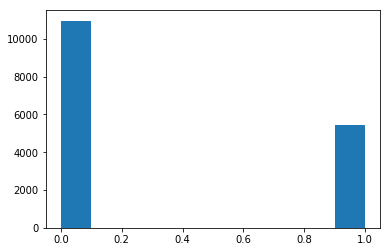

In [251]:
plt.hist(BikeBuyer["BikeBuyer"])

In [252]:
op=[Adv_Works,Ave_Month, BikeBuyer]
df_final_2 = reduce(lambda left,right: pd.merge(left,right,on='CustomerID',how='outer'), op)
df_final = reduce(lambda left,right: pd.merge(left,right,on='CustomerID'), op)
print(df_final_2.describe())

         CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count  16404.000000   16404.000000     16404.000000          16404.000000   
mean   20240.143136       0.674104         1.499756              0.991100   
std     5340.370705       0.468723         1.139135              1.514278   
min    11000.000000       0.000000         0.000000              0.000000   
25%    15617.750000       0.000000         1.000000              0.000000   
50%    20231.500000       1.000000         2.000000              0.000000   
75%    24862.250000       1.000000         2.000000              2.000000   
max    29482.000000       1.000000         4.000000              5.000000   

       TotalChildren   YearlyIncome  AveMonthSpend     BikeBuyer  
count   16404.000000   16404.000000   16404.000000  16404.000000  
mean        2.004511   78128.531517      72.389905      0.332297  
std         1.682318   39726.533060      27.269568      0.471051  
min         0.000000    9482.000000   

In [253]:
df_final_2["Date_Birth"]=pd.to_datetime(df_final_2.BirthDate,infer_datetime_format=True)

In [254]:
age_constant= datetime.strptime("1/1/1998","%d/%m/%Y")
df_final_2["Age"] = (age_constant-df_final_2.Date_Birth).dt.days/365

In [255]:
under_25= df_final_2[df_final_2["Age"]<25]
over_55= df_final_2[df_final_2["Age"]>55]
b25to45= df_final_2[df_final_2["Age"]<45][df_final_2["Age"]>=25]
b45to55= df_final_2[df_final_2["Age"]<55][df_final_2["Age"]>=45]
print(under_25.groupby(["Gender"])["AveMonthSpend"].sum())
print(over_55.groupby(["Gender"])["AveMonthSpend"].sum())
print(b25to45.groupby(["Gender"])["AveMonthSpend"].sum())
print(b45to55.groupby(["Gender"])["AveMonthSpend"].sum())

Gender
F     70476
M    107615
Name: AveMonthSpend, dtype: int64
Gender
F    25182
M    37993
Name: AveMonthSpend, dtype: int64
Gender
F    293873
M    473074
Name: AveMonthSpend, dtype: int64
Gender
F     69881
M    109390
Name: AveMonthSpend, dtype: int64


C:\Users\user\Miniconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [256]:
df_final_2.groupby(["Gender"])["AveMonthSpend"].median()

Gender
F    52
M    79
Name: AveMonthSpend, dtype: int64

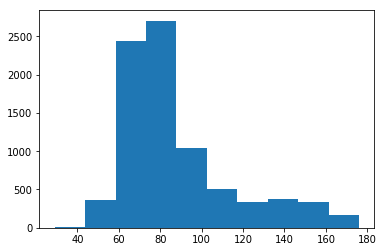

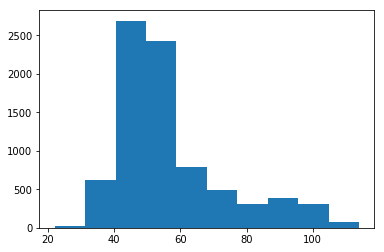

In [257]:
plt.hist(df_final_2[df_final_2["Gender"]=="M"]["AveMonthSpend"])
plt.show()
plt.hist(df_final_2[df_final_2["Gender"]=="F"]["AveMonthSpend"])
plt.show()

In [258]:
df_final_2.groupby("NumberChildrenAtHome")["AveMonthSpend"].median()

NumberChildrenAtHome
0     57
1     68
2     79
3     90
4    101
5    110
Name: AveMonthSpend, dtype: int64

In [259]:
df_final_2.groupby("NumberCarsOwned")["AveMonthSpend"].median()

NumberCarsOwned
0     65
1     63
2     64
3     92
4    100
Name: AveMonthSpend, dtype: int64

In [260]:
df_final_2.groupby("MaritalStatus")["AveMonthSpend"].median()

MaritalStatus
M    74
S    62
Name: AveMonthSpend, dtype: int64

In [261]:
df_final_2.groupby("BikeBuyer")["YearlyIncome"].median()

BikeBuyer
0    65954
1    96084
Name: YearlyIncome, dtype: int64

In [262]:
df_final_2.groupby("BikeBuyer")["NumberCarsOwned"].median()

BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64

In [263]:
df_final_2.groupby("BikeBuyer")["Occupation"].agg(pd.Series.mode)

BikeBuyer
0    Skilled Manual
1      Professional
Name: Occupation, dtype: object

In [264]:
df_final_2.groupby(["MaritalStatus"])["BikeBuyer"].count()

MaritalStatus
M    8852
S    7552
Name: BikeBuyer, dtype: int64

In [265]:
df_final_3=df_final_2.copy(deep=True)
lis_na=[]
for a, b in enumerate(df_final_3.columns):
    if df_final_3[pd.isna(df_final_3[b])][b].shape[0]>=0.2*(df_final_3[b].shape[0]):
        lis_na.append(b)
        print(b)

Title
MiddleName
Suffix
AddressLine2


In [266]:
df_final_3=df_final_3.drop(columns=[x for x in lis_na])
df_final_3.dtypes

CustomerID                       int64
FirstName                       object
LastName                        object
AddressLine1                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate                       object
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
AveMonthSpend                    int64
BikeBuyer                        int64
Date_Birth              datetime64[ns]
Age                            float64
dtype: object

In [267]:
#### trial    
#### trial    
#### trial 



In [268]:
fit= df_final_3
fit=fit.drop(columns=["FirstName","LastName", "AddressLine1", "PostalCode", "PhoneNumber",
                      "BirthDate","Date_Birth","City","AveMonthSpend"])


In [269]:
fit=fit.drop(columns=["CustomerID","StateProvinceName", "CountryRegionName"])

# # Machine learning

HomeOwnerFlag           0.000127
NumberCarsOwned         0.164835
NumberChildrenAtHome    0.455930
TotalChildren           0.233594
YearlyIncome            0.286665
BikeBuyer               1.000000
Age                     0.137217
Name: BikeBuyer, dtype: float64


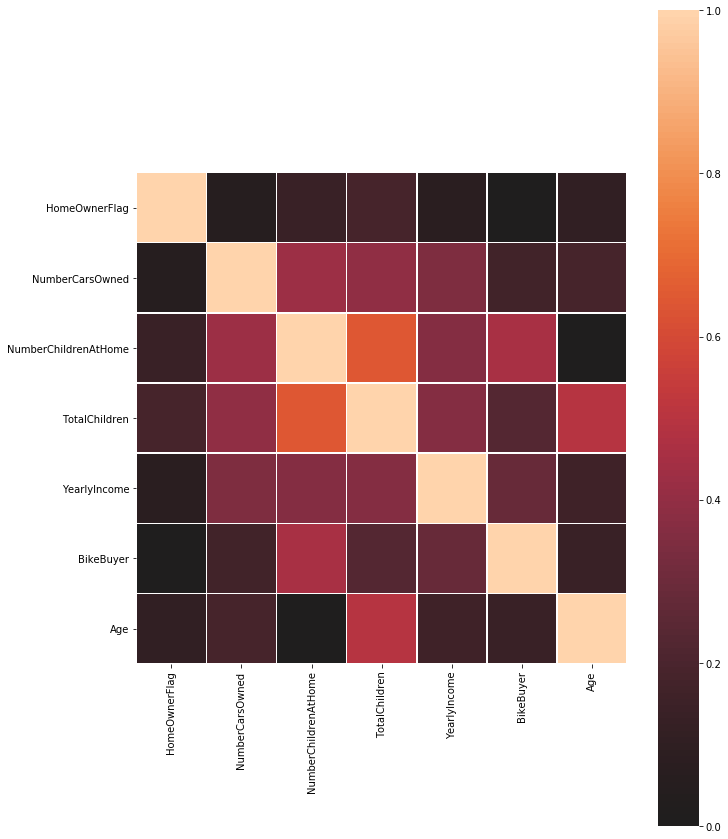

In [270]:

corr_matrix = fit.corr().abs()

# plot the heatmap
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      vmin = 0, 
                      vmax = 1, center=0)
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
print(corr_matrix.BikeBuyer)

In [271]:
d = defaultdict(LabelEncoder)
fit_0=df_final_3.drop(columns=["FirstName","LastName", "AddressLine1", 
                               "PostalCode", "PhoneNumber","BirthDate","Date_Birth","City","AveMonthSpend"])
fit_0=fit_0.drop(columns=["CustomerID","StateProvinceName", "CountryRegionName"])
fit_1= fit_0.select_dtypes(include="object").apply(lambda x: d[x.name].fit_transform(x))
fit=pd.concat([fit_1,fit_0.select_dtypes(exclude="object")], axis=1)
print(fit.columns)
print(fit_1.columns)
print(df_final_3.columns)

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'Age'],
      dtype='object')
Index(['Education', 'Occupation', 'Gender', 'MaritalStatus'], dtype='object')
Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer',
       'Date_Birth', 'Age'],
      dtype='object')


In [272]:
#data preparation split
label=fit["BikeBuyer"]
fit=fit.drop(columns=["BikeBuyer"])
print(fit.shape)

(16404, 10)


In [273]:
fit_train, fit_test, label_train, label_test = ms.train_test_split(fit, label, test_size=0.2, random_state=42)

In [274]:
nr.seed(123)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=5, shuffle = True)

In [275]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": [2, 3, 5, 10], "min_samples_leaf":[3, 5, 10, 20]}
## Define the random forest model
nr.seed(3456)
rf_clf = RandomForestClassifier(class_weight = "balanced") # class_weight = {0:0.33, 1:0.67}) 

## Perform the grid search over the parameters
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(fit, label)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

5
20


In [276]:
nr.seed(498)
rf_clf2=RandomForestClassifier(n_estimators=10, min_samples_leaf=rf_clf.best_estimator_.min_samples_leaf,max_features=rf_clf.best_estimator_.max_features)
cv_estimate = ms.cross_val_score(rf_clf2, fit, label, cv = outside) # Use the outside folds
# cv_estimate_2 = ms.cross_validate(clf, label_train, label_train, cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.796
SDT of the metric       = 0.010
Outcomes by cv fold
Fold  1    0.797
Fold  2    0.797
Fold  3    0.801
Fold  4    0.777
Fold  5    0.806


In [277]:
rf_clf=RandomForestClassifier(n_estimators=10, min_samples_leaf=rf_clf.best_estimator_.min_samples_leaf,max_features=rf_clf.best_estimator_.max_features)
rf_clf.fit(fit_train, label_train) 
ko=rf_clf.predict(fit_test)
metrics = sklm.precision_recall_fscore_support(label_test.values, ko)
conf = sklm.confusion_matrix(label_test.values, ko)
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')
print('Accuracy  %0.2f' % sklm.accuracy_score(label_test.values, ko))
print(' ')
print('           Positive      Negative')
print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2004               207
Actual negative       453               617

Accuracy  0.80
 
           Positive      Negative
Num case     2211          1070
Precision    0.82          0.75
Recall       0.91          0.58
F1           0.86          0.65


In [278]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 1, 10]}
## Define the AdaBoosted tree model
nr.seed(3456)
ab_clf = AdaBoostClassifier()  

## Perform the grid search over the parameters
nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
ab_clf.fit(fit, label)
print(ab_clf.best_estimator_.learning_rate)

1


In [279]:
print(ab_clf.best_estimator_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=50, random_state=None)


In [280]:
nr.seed(498)
ada_clf2 = AdaBoostClassifier(learning_rate=ab_clf.best_estimator_.learning_rate, n_estimators=ab_clf.best_estimator_.n_estimators)
cv_estimate = ms.cross_val_score(ada_clf2, fit, label, cv = outside) # Use the outside folds
# cv_estimate_2 = ms.cross_validate(clf, label_train, label_train, cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))


Mean performance metric = 0.792
SDT of the metric       = 0.006
Outcomes by cv fold
Fold  1    0.791
Fold  2    0.795
Fold  3    0.800
Fold  4    0.783
Fold  5    0.794


In [281]:
ada_clf = AdaBoostClassifier(learning_rate=ab_clf.best_estimator_.learning_rate, n_estimators=ab_clf.best_estimator_.n_estimators)
ada_clf.fit(fit_train, label_train) 
ko=ada_clf.predict(fit_test)
metrics = sklm.precision_recall_fscore_support(label_test.values, ko)
conf = sklm.confusion_matrix(label_test.values, ko)
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')
print('Accuracy  %0.2f' % sklm.accuracy_score(label_test.values, ko))
print(' ')
print('           Positive      Negative')
print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1966               245
Actual negative       429               641

Accuracy  0.79
 
           Positive      Negative
Num case     2211          1070
Precision    0.82          0.72
Recall       0.89          0.60
F1           0.85          0.66


In [282]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 1, 10], 'n_estimators': [5, 10, 20, 40, 80]}
## Define the AdaBoosted tree model
nr.seed(3456)
xbost_clf = XGBClassifier()  

## Perform the grid search over the parameters
nr.seed(4455)
xbost_clf = ms.GridSearchCV(estimator = xbost_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
xbost_clf.fit(fit, label)
print(xbost_clf.best_estimator_.learning_rate,xbost_clf.best_estimator_.n_estimators )
xbost_besLN=xbost_clf.best_estimator_.learning_rate
xbost_bestNE=xbost_clf.best_estimator_.n_estimators

0.1 80


In [283]:
nr.seed(498)
xbost_clf = XGBClassifier(learning_rate=xbost_clf.best_estimator_.learning_rate, n_estimators=xbost_clf.best_estimator_.n_estimators )
cv_estimate = ms.cross_val_score(xbost_clf, fit, label, cv = outside) # Use the outside folds
# cv_estimate_2 = ms.cross_validate(clf, label_train, label_train, cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.801
SDT of the metric       = 0.008
Outcomes by cv fold
Fold  1    0.801
Fold  2    0.805
Fold  3    0.803
Fold  4    0.787
Fold  5    0.811


In [284]:
xbost_clf = XGBClassifier(learning_rate=xbost_besLN,
                    n_estimators=xbost_bestNE)
xbost_clf.fit(fit_train, label_train) 
ko=xbost_clf.predict(fit_test)
metrics = sklm.precision_recall_fscore_support(label_test.values, ko)
conf = sklm.confusion_matrix(label_test.values, ko)
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')
print('Accuracy  %0.2f' % sklm.accuracy_score(label_test.values, ko))
print(' ')
print('           Positive      Negative')
print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2030               181
Actual negative       465               605

Accuracy  0.80
 
           Positive      Negative
Num case     2211          1070
Precision    0.81          0.77
Recall       0.92          0.57
F1           0.86          0.65


In [285]:
clf = BernoulliNB()
clf.fit(fit_train, label_train) 
ko=clf.predict(fit_test)
metrics = sklm.precision_recall_fscore_support(label_test.values, ko)
conf = sklm.confusion_matrix(label_test.values, ko)
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')
print('Accuracy  %0.2f' % sklm.accuracy_score(label_test.values, ko))
print(' ')
print('           Positive      Negative')
print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1885               326
Actual negative       527               543

Accuracy  0.74
 
           Positive      Negative
Num case     2211          1070
Precision    0.78          0.62
Recall       0.85          0.51
F1           0.82          0.56


In [286]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, fit, label, cv = outside) # Use the outside folds
# cv_estimate_2 = ms.cross_validate(clf, label_train, label_train, cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.734
SDT of the metric       = 0.009
Outcomes by cv fold
Fold  1    0.732
Fold  2    0.738
Fold  3    0.740
Fold  4    0.717
Fold  5    0.741


In [287]:
clf = GaussianNB()
clf.fit(fit_train, label_train) 
ko=clf.predict(fit_test)
metrics = sklm.precision_recall_fscore_support(label_test.values, ko)
conf = sklm.confusion_matrix(label_test.values, ko)
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')
print('Accuracy  %0.2f' % sklm.accuracy_score(label_test.values, ko))
print(' ')
print('           Positive      Negative')
print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2045               166
Actual negative       602               468

Accuracy  0.77
 
           Positive      Negative
Num case     2211          1070
Precision    0.77          0.74
Recall       0.92          0.44
F1           0.84          0.55


In [288]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, fit, label, cv = outside) # Use the outside folds
# cv_estimate_2 = ms.cross_validate(clf, label_train, label_train, cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.765
SDT of the metric       = 0.008
Outcomes by cv fold
Fold  1    0.751
Fold  2    0.770
Fold  3    0.768
Fold  4    0.762
Fold  5    0.773


In [289]:
Testing2=Testing
Testing2["Date_Birth"]=pd.to_datetime(Testing2.BirthDate,infer_datetime_format=True)
# (datetime(1998,1,1)-df_final_2.Date_Birth[0]).days/635
age_constant= datetime.strptime("1/1/1998","%d/%m/%Y")
Testing2["Age"] = (age_constant-Testing.Date_Birth).dt.days/365
Testing2=Testing2[['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age']]
Testing2

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,Bachelors,Management,F,S,0,2,0,5,86931,53.024658
1,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,33.265753
2,Graduate Degree,Management,F,M,1,2,0,4,103985,64.013699
3,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,39.304110
4,High School,Manual,F,M,1,1,2,2,21876,32.810959
5,Partial College,Clerical,F,M,1,1,0,1,44467,40.386301
6,Bachelors,Skilled Manual,M,S,1,2,2,4,77702,33.515068
7,Bachelors,Professional,M,M,1,3,4,4,99418,33.079452
8,Partial High School,Manual,M,S,1,1,4,4,13522,31.967123
9,Bachelors,Skilled Manual,F,M,1,1,1,1,46264,24.317808


# # Use Best Model

In [290]:
Testing3= Testing2.select_dtypes(include="object").apply(lambda x: d[x.name].fit_transform(x))
Testing3=pd.concat([Testing3,Testing2.select_dtypes(exclude="object")], axis=1)

print(Testing3.columns)
print(fit_test.columns)

scores_final = ada_clf.predict(Testing3)
np.savetxt('final_tes_answer_class33.csv', scores_final, delimiter=',',fmt='%i')

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age'],
      dtype='object')
Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age'],
      dtype='object')
